In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.utils import class_weight
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report


In [10]:
# Load the dataset
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [269]:
#Drop irrelevant columns 'id' and 'Unnamed: 32' 
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

In [270]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [271]:
#Convert 'diagnosis' column to binary (Malignant=1, Benign=0)
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

In [272]:
# Separate the features (X) and the target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [273]:
pd.set_option('future.no_silent_downcasting', True)

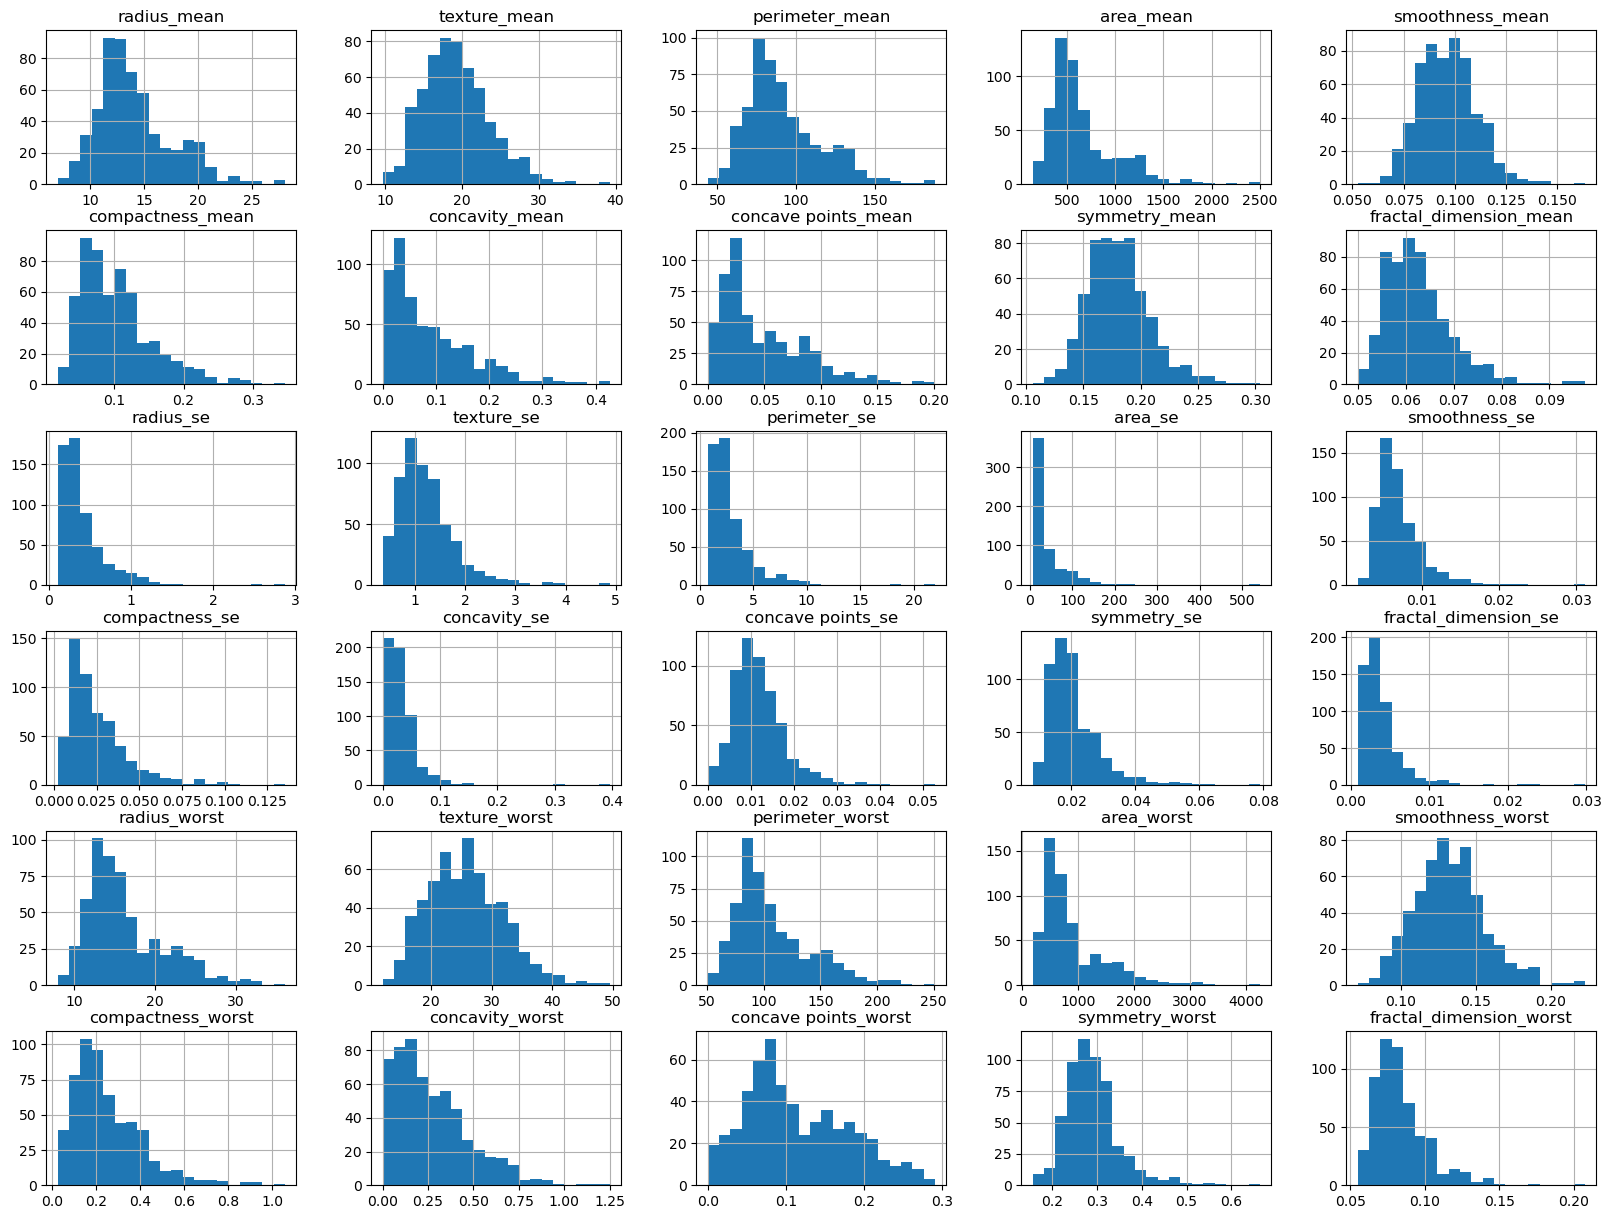

In [275]:
# Plot distribution of key features
df.hist(bins=20, figsize=(20,15))
plt.show()

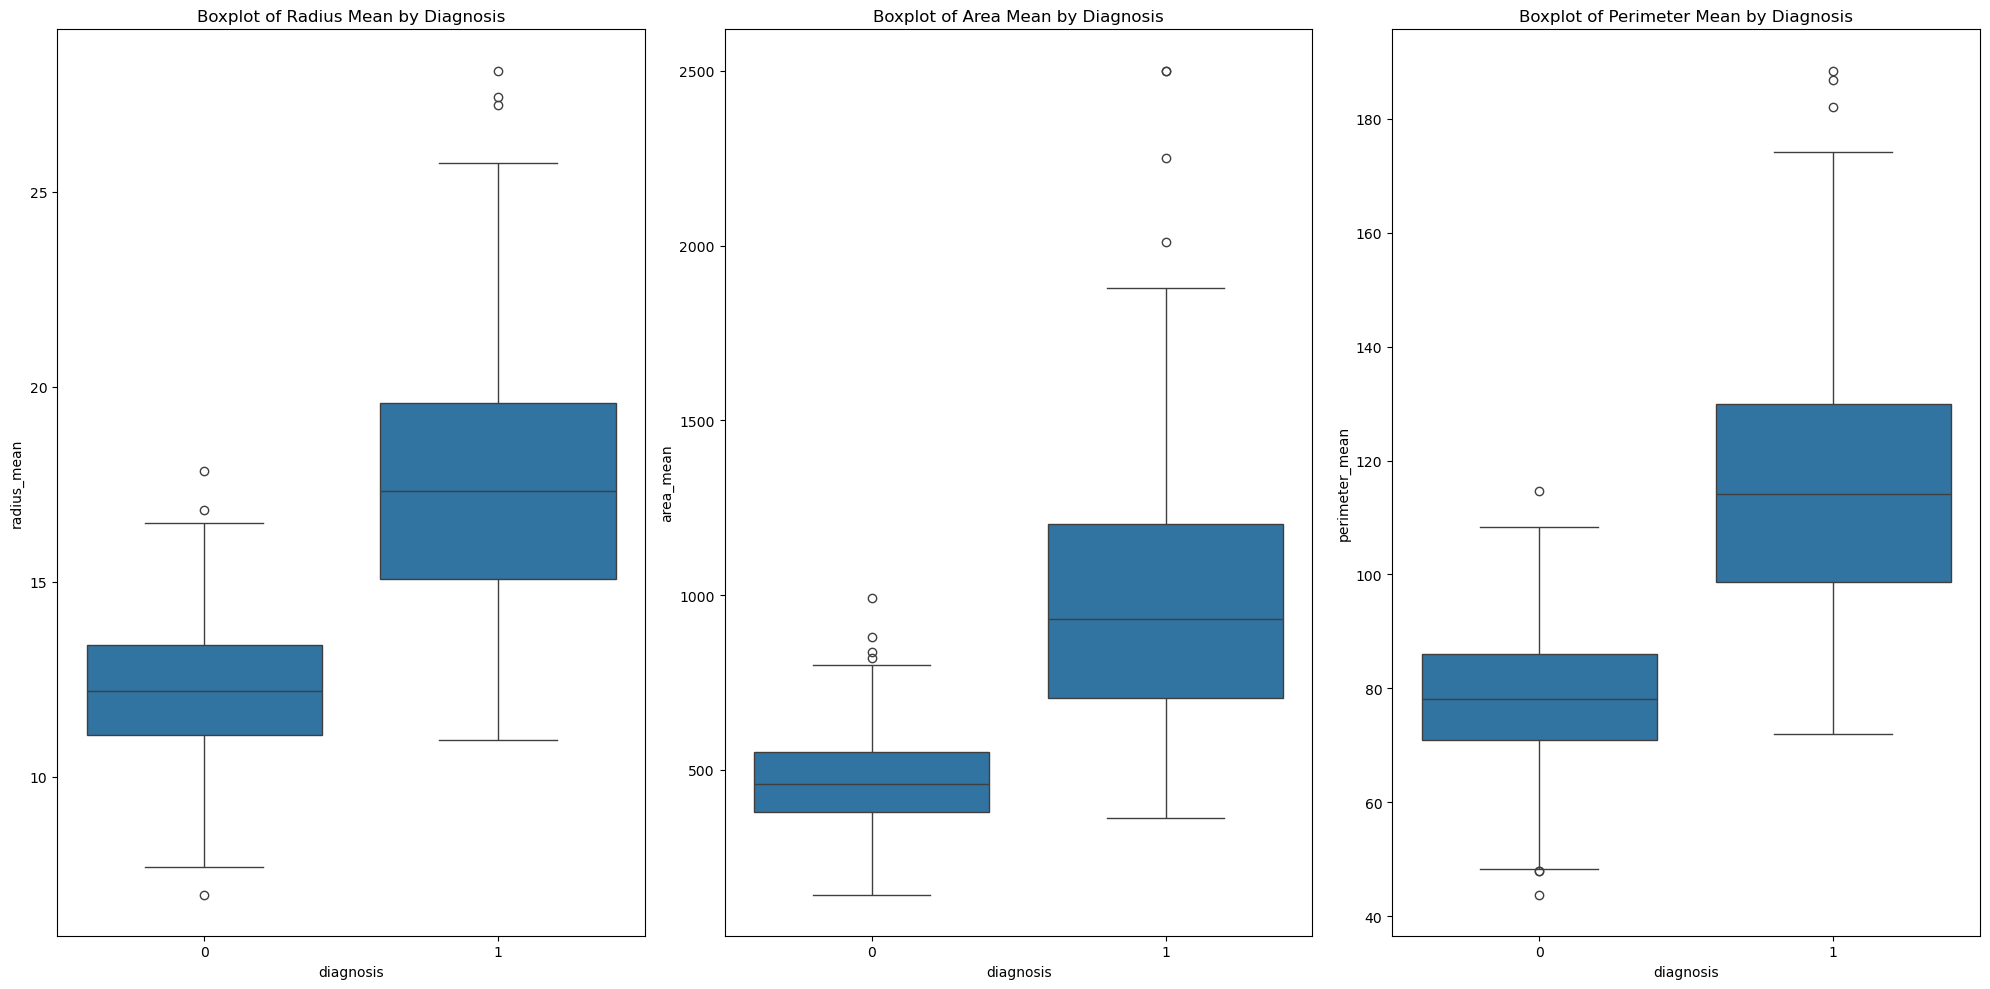

In [276]:
# Boxplot for key features to check for outliers
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Boxplot of Radius Mean by Diagnosis')

plt.subplot(1, 3, 2)
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.title('Boxplot of Area Mean by Diagnosis')

plt.subplot(1, 3, 3)
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df)
plt.title('Boxplot of Perimeter Mean by Diagnosis')

plt.tight_layout()
plt.show()

In [277]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
# Apply RobustScaler to scale the features (handle outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [279]:
# Ensure y_train is a NumPy array and contains integers (0 and 1)
y_train = np.array(y_train).astype(int)

In [280]:
# Ensure X_train_scaled is a NumPy array
X_train_scaled = np.array(X_train_scaled)

In [281]:
# Compute class weights to handle the class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights.astype(float)))  # Make sure they are floats


In [282]:
print("Class Weights:", class_weights_dict) 

Class Weights: {0: 0.7954545454545454, 1: 1.3461538461538463}


In [283]:
# Build and compile the Artificial Neural Network (ANN) model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(X_train_scaled.shape[1],)))  # Input layer
model.add(tf.keras.layers.Dense(16, activation='relu'))  # Hidden layer 1
model.add(tf.keras.layers.Dense(16, activation='relu'))  # Hidden layer 2
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [284]:
# Train the model with class weights to handle imbalance
history = model.fit(
    X_train_scaled, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2, 
    class_weight=class_weights_dict,  # Pass the class weights
    verbose=2
)


Epoch 1/100
12/12 - 3s - 291ms/step - accuracy: 0.4560 - loss: 0.7103 - val_accuracy: 0.5275 - val_loss: 0.6607
Epoch 2/100
12/12 - 0s - 14ms/step - accuracy: 0.6676 - loss: 0.6307 - val_accuracy: 0.7143 - val_loss: 0.5908
Epoch 3/100
12/12 - 0s - 12ms/step - accuracy: 0.8022 - loss: 0.5540 - val_accuracy: 0.8242 - val_loss: 0.5231
Epoch 4/100
12/12 - 0s - 12ms/step - accuracy: 0.8626 - loss: 0.4809 - val_accuracy: 0.8462 - val_loss: 0.4603
Epoch 5/100
12/12 - 0s - 13ms/step - accuracy: 0.9148 - loss: 0.4100 - val_accuracy: 0.8791 - val_loss: 0.3985
Epoch 6/100
12/12 - 0s - 12ms/step - accuracy: 0.9368 - loss: 0.3447 - val_accuracy: 0.9011 - val_loss: 0.3403
Epoch 7/100
12/12 - 0s - 13ms/step - accuracy: 0.9533 - loss: 0.2868 - val_accuracy: 0.9341 - val_loss: 0.2916
Epoch 8/100
12/12 - 0s - 12ms/step - accuracy: 0.9505 - loss: 0.2407 - val_accuracy: 0.9341 - val_loss: 0.2497
Epoch 9/100
12/12 - 0s - 13ms/step - accuracy: 0.9588 - loss: 0.2034 - val_accuracy: 0.9451 - val_loss: 0.2171


In [285]:
# Ensure X_test_scaled and y_test are properly formatted

# Convert X_test_scaled to a NumPy array and ensure it contains float data
X_test_scaled = np.array(X_test_scaled, dtype=np.float32)

# Convert y_test to a NumPy array and ensure it contains integers
y_test = np.array(y_test, dtype=np.int32)

# evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 97.37%


In [286]:
# Make predictions and evaluate performance
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [287]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [288]:
# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights.astype(float)))

In [289]:
#  Build the ANN model with Dropout and EarlyStopping
model = tf.keras.models.Sequential()

# Input and first hidden layer
model.add(tf.keras.layers.InputLayer(shape=(X_train_scaled.shape[1],)))
model.add(tf.keras.layers.Dense(16, activation='relu'))

# Adding Dropout to prevent overfitting
model.add(tf.keras.layers.Dropout(0.3))

# Second hidden layer with Dropout
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

# Output layer (binary classification)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [290]:
# Define callbacks for early stopping and learning rate scheduling
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
# Early stopping to stop training if validation loss doesn't improve for 10 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate scheduler to reduce the learning rate as the model trains
def lr_scheduler(epoch):
    return 1e-3 * 10 ** (-epoch / 20)

lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [292]:
#Train the model with class weights, dropout, and early stopping
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,  # Handle class imbalance
    callbacks=[early_stop, lr_scheduler_callback],  # Include early stopping and LR scheduler
    verbose=2
)

Epoch 1/100
12/12 - 4s - 302ms/step - accuracy: 0.3819 - loss: 0.8508 - val_accuracy: 0.3626 - val_loss: 0.8124 - learning_rate: 0.0010
Epoch 2/100
12/12 - 0s - 13ms/step - accuracy: 0.4670 - loss: 0.6717 - val_accuracy: 0.4396 - val_loss: 0.7172 - learning_rate: 8.9125e-04
Epoch 3/100
12/12 - 0s - 11ms/step - accuracy: 0.5522 - loss: 0.5917 - val_accuracy: 0.5824 - val_loss: 0.6529 - learning_rate: 7.9433e-04
Epoch 4/100
12/12 - 0s - 10ms/step - accuracy: 0.5357 - loss: 0.5950 - val_accuracy: 0.6923 - val_loss: 0.6049 - learning_rate: 7.0795e-04
Epoch 5/100
12/12 - 0s - 11ms/step - accuracy: 0.6319 - loss: 0.5460 - val_accuracy: 0.7253 - val_loss: 0.5644 - learning_rate: 6.3096e-04
Epoch 6/100
12/12 - 0s - 12ms/step - accuracy: 0.6676 - loss: 0.5230 - val_accuracy: 0.7802 - val_loss: 0.5339 - learning_rate: 5.6234e-04
Epoch 7/100
12/12 - 0s - 12ms/step - accuracy: 0.7033 - loss: 0.5037 - val_accuracy: 0.8132 - val_loss: 0.5088 - learning_rate: 5.0119e-04
Epoch 8/100
12/12 - 0s - 11ms/

In [294]:
#Evaluate the model on the test set
y_test = np.array(y_test, dtype=np.int32)  
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 95.61%


In [296]:
# Make predictions and evaluate performance
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [298]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[66  5]
 [ 0 43]]


In [300]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      0.93      0.96        71
   Malignant       0.90      1.00      0.95        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [302]:
# Build the ANN model with additional layers and L2 Regularization
model = tf.keras.models.Sequential()

# Input and first hidden layer with L2 regularization
model.add(tf.keras.layers.InputLayer(shape=(X_train_scaled.shape[1],)))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.25))

# Second hidden layer with L2 regularization
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.25))

# Output layer (binary classification)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [304]:
# Train the model with class weights, dropout, and early stopping
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[early_stop, lr_scheduler_callback],
    verbose=2
)

Epoch 1/100
12/12 - 4s - 323ms/step - accuracy: 0.3764 - loss: 0.9021 - val_accuracy: 0.7143 - val_loss: 0.6835 - learning_rate: 0.0010
Epoch 2/100
12/12 - 0s - 14ms/step - accuracy: 0.6126 - loss: 0.6375 - val_accuracy: 0.7912 - val_loss: 0.5812 - learning_rate: 8.9125e-04
Epoch 3/100
12/12 - 0s - 13ms/step - accuracy: 0.7390 - loss: 0.5542 - val_accuracy: 0.8681 - val_loss: 0.5229 - learning_rate: 7.9433e-04
Epoch 4/100
12/12 - 0s - 13ms/step - accuracy: 0.7885 - loss: 0.4906 - val_accuracy: 0.9011 - val_loss: 0.4762 - learning_rate: 7.0795e-04
Epoch 5/100
12/12 - 0s - 11ms/step - accuracy: 0.8434 - loss: 0.4539 - val_accuracy: 0.9121 - val_loss: 0.4375 - learning_rate: 6.3096e-04
Epoch 6/100
12/12 - 0s - 11ms/step - accuracy: 0.8626 - loss: 0.4251 - val_accuracy: 0.9231 - val_loss: 0.4061 - learning_rate: 5.6234e-04
Epoch 7/100
12/12 - 0s - 11ms/step - accuracy: 0.8626 - loss: 0.3942 - val_accuracy: 0.9341 - val_loss: 0.3806 - learning_rate: 5.0119e-04
Epoch 8/100
12/12 - 0s - 15ms/

In [306]:
# Evaluate the model on the test set
y_test = np.array(y_test, dtype=np.int32)

# Evaluate the model on the test set and print accuracy
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 95.61%


In [308]:
# Make predictions on the test set
# Predicting the classes (0 or 1) using a 0.5 threshold
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

#  Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Confusion Matrix:
 [[66  5]
 [ 0 43]]


In [310]:
# This report includes precision, recall, F1-score, and support for each class
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      0.93      0.96        71
   Malignant       0.90      1.00      0.95        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [312]:
# Adjust class weights to reduce bias toward malignant class
# Assign slightly more weight to benign cases
class_weights_dict = {0: 1.5, 1: 1.0}

In [314]:
# Step 8: Build the model with L2 regularization and increased neurons
model = tf.keras.models.Sequential()

# First hidden layer with L2 regularization
model.add(tf.keras.layers.InputLayer(shape=(X_train_scaled.shape[1],)))  
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.3))  # Dropout to avoid overfitting

# Second hidden layer with L2 regularization
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.3))

# Output layer (binary classification)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [316]:
# Define early stopping with increased patience
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


In [318]:
# Define the learning rate scheduler
def lr_scheduler(epoch):
    return 1e-3 * 10 ** (-epoch / 20)

lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [320]:
# Train the model with the adjusted class weights, early stopping, and learning rate scheduler
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,  # Adjusted class weights
    callbacks=[early_stop, lr_scheduler_callback],
    verbose=2
)

Epoch 1/100
12/12 - 4s - 312ms/step - accuracy: 0.6126 - loss: 0.9012 - val_accuracy: 0.7802 - val_loss: 0.6293 - learning_rate: 0.0010
Epoch 2/100
12/12 - 0s - 13ms/step - accuracy: 0.7940 - loss: 0.7642 - val_accuracy: 0.8791 - val_loss: 0.5360 - learning_rate: 8.9125e-04
Epoch 3/100
12/12 - 0s - 13ms/step - accuracy: 0.8379 - loss: 0.6690 - val_accuracy: 0.9011 - val_loss: 0.4713 - learning_rate: 7.9433e-04
Epoch 4/100
12/12 - 0s - 11ms/step - accuracy: 0.8929 - loss: 0.5703 - val_accuracy: 0.9121 - val_loss: 0.4204 - learning_rate: 7.0795e-04
Epoch 5/100
12/12 - 0s - 24ms/step - accuracy: 0.8984 - loss: 0.5332 - val_accuracy: 0.9231 - val_loss: 0.3812 - learning_rate: 6.3096e-04
Epoch 6/100
12/12 - 0s - 13ms/step - accuracy: 0.9258 - loss: 0.4774 - val_accuracy: 0.9231 - val_loss: 0.3531 - learning_rate: 5.6234e-04
Epoch 7/100
12/12 - 0s - 11ms/step - accuracy: 0.9341 - loss: 0.4366 - val_accuracy: 0.9231 - val_loss: 0.3294 - learning_rate: 5.0119e-04
Epoch 8/100
12/12 - 0s - 12ms/

In [322]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 98.25%


In [324]:
# Make predictions on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [326]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[70  1]
 [ 1 42]]


In [328]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        71
   Malignant       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

